In [1]:
import pandas as pd
pd.set_option('display.max_rows', 26)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt 
import seaborn as sns

import numpy as np

from tqdm.notebook import tqdm

## 1. Первчиная подготовка данных

In [2]:
df = pd.read_csv('imports-85_data.csv', 
                 header = None)

In [3]:
df.shape

(205, 26)

In [4]:
# Взгляд на данные 
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Среди исходных файлов не нашлось файла с названиями колонок. извлечем их из текстового описания

In [5]:
columns_str = """1. symboling: -3, -2, -1, 0, 1, 2, 3.
                2. normalized-losses: continuous from 65 to 256.
                3. make:
                alfa-romero, audi, bmw, chevrolet, dodge, honda,
                isuzu, jaguar, mazda, mercedes-benz, mercury,
                mitsubishi, nissan, peugot, plymouth, porsche,
                renault, saab, subaru, toyota, volkswagen, volvo

                4. fuel-type: diesel, gas.
                5. aspiration: std, turbo.
                6. num-of-doors: four, two.
                7. body-style: hardtop, wagon, sedan, hatchback, convertible.
                8. drive-wheels: 4wd, fwd, rwd.
                9. engine-location: front, rear.
                10. wheel-base: continuous from 86.6 120.9.
                11. length: continuous from 141.1 to 208.1.
                12. width: continuous from 60.3 to 72.3.
                13. height: continuous from 47.8 to 59.8.
                14. curb-weight: continuous from 1488 to 4066.
                15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
                16. num-of-cylinders: eight, five, four, six, three, twelve, two.
                17. engine-size: continuous from 61 to 326.
                18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
                19. bore: continuous from 2.54 to 3.94.
                20. stroke: continuous from 2.07 to 4.17.
                21. compression-ratio: continuous from 7 to 23.
                22. horsepower: continuous from 48 to 288.
                23. peak-rpm: continuous from 4150 to 6600.
                24. city-mpg: continuous from 13 to 49.
                25. highway-mpg: continuous from 16 to 54.
                26. price: continuous from 5118 to 45400."""

mapping = dict() 

for row in columns_str.split('\n'):
    row_cleared = row.replace(' ', '')
    if len(row_cleared) and row_cleared[0].isdigit():
        row_cleared = row_cleared.split(':')[0].split('.')
        mapping[int(row_cleared[0]) - 1] = row_cleared[1]
        
df.rename(columns = mapping,
          inplace = True)

In [6]:
# Взгляд на данные
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [7]:
# Взгляд на данные
df.loc[: , (df == '?').any()]

,normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price
0,?,two,3.47,2.68,111,5000,13495
1,?,two,3.47,2.68,111,5000,16500
2,?,two,2.68,3.47,154,5000,16500
3,164,four,3.19,3.40,102,5500,13950
4,164,four,3.19,3.40,115,5500,17450
...,...,...,...,...,...,...,...
200,95,four,3.78,3.15,114,5400,16845
201,95,four,3.78,3.15,160,5300,19045
202,95,four,3.58,2.87,134,5500,21485
203,95,four,3.01,3.40,106,4800,22470


In [8]:
# Заменим '?' на nan для более удобной работы
df.replace('?', np.nan, inplace = True)
df.loc[: , (df.isna()).any()].columns 

Index(['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

In [9]:
# Количество незаполненных значений по атрибутам
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### 2. Постановка возможных задач
*Задание 1. Придумайте и опишите наибольшее число вариантов использования этих данных. Для 
решения каких практических задач их можно применить?*

1. Предсказание какого-либо из параметров в датасете. Конечно, не каждый из параметров получится предсказывать с адекватным качеством или вообще есть смысл здравый смысл в этом (например, в предсказании *length*, *width* или *num-of-doors*). Но для интереса можно попробовать построить различные классификаторы: определение производителя *make*, разбить по бинам и предсказать *horsepower* (к примеру, 0 - 50, 50 - 75 и т.д.).<br> **Наибольший практический интерес, на мой взгляд, представляет из себя предсказание стоимости *price***<br><br>

2. Поиск схожих групп в данных - кластеризация. Это может позволить найти, например, схожие по различным параметрам автомобили.<br><br>
4. Восстановление пропущенных значений на основании имеющихся данных.<br><br>
3. Анализ различных параметров - распространенность производителя, стоимости машин, типа топлива, линейных размеров и т.д. При желании, можно проверить есть ли статистически значимая разница между средними параметрами  у различных производителей/из различной ценовой категории и т.д. (Например, применить статистический тест для сравнения средних значений линейных размеров автомобилей между высокой и низкой ценовыми категориями)<br><br>

**Остановимся на предсказании стоимости *price*** для *Задания 2. "Выберите одну из описанных вами задач и реализуйте ее решение на Python / R при помощи оптимальной на ваш взгляд модели. Опишите, почему вы выбрали именно эту модель."*

**Прежде чем строить предсказательную модель, исследуем и подготовим данные**, т.е. займемся частично *Заданием 3. "Опишите ваш подход к предварительному анализу (в т.ч. визуализации) и обработке данных, работе с признаками, кросс валидацией, настройкой модели и ее оценкой. Объясните выбор того или иного решения и, по возможности, сравните с альтернативами."*

### 3. Исследование и подготовка данных

#### 3.1. Преобразование типов данных

In [10]:
# Имеются явно числовые параметры по своему смыслу, которые в исходном варианте представлены строкой.
# Преобразуем их 
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [11]:
# Преобразование к числовому типу данных
str_columns = []

for column in tqdm(df.columns):
    try:
        df[column] = df[column].astype('float')
    except:
        str_columns.append(column)
        print(column)

  0%|          | 0/26 [00:00<?, ?it/s]

make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
engine-type
num-of-cylinders
fuel-system


In [12]:
# Оценим наполняемость и число уникальных значений в стринговых колонках
print('Unique values', end = '\n\n')
for c in str_columns:
    print(f'{c}: {df[c].nunique()}')

Unique values

make: 22
fuel-type: 2
aspiration: 2
num-of-doors: 2
body-style: 5
drive-wheels: 3
engine-location: 2
engine-type: 7
num-of-cylinders: 7
fuel-system: 8


In [13]:
# Оценим наполняемость и число уникальных значений в стринговых колонках
df[str_columns].isna().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64

#### 3.2. Визуализация

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


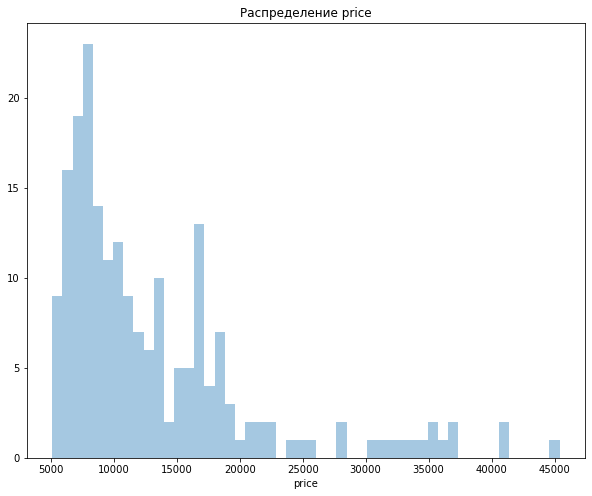

In [14]:
# Распределение price явно skewed
plt.figure(figsize = (10,8))
sns.distplot(df['price'], 
             bins = 50, 
             kde = False)
plt.title('Распределение price')
plt.show()

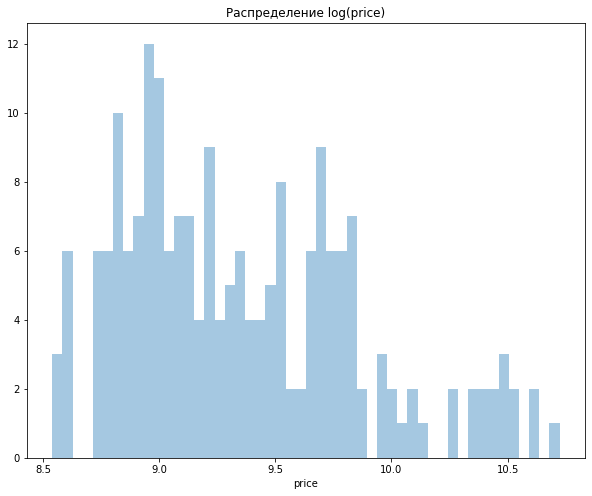

In [15]:
# Можно будет избавиться от проблемы при помощи логарифмирования, если будем браться за линейные модели
plt.figure(figsize = (10,8))
sns.distplot(np.log(df['price']), 
             bins = 50, 
             kde = False)
plt.title('Распределение log(price)')
plt.show()

<AxesSubplot:>

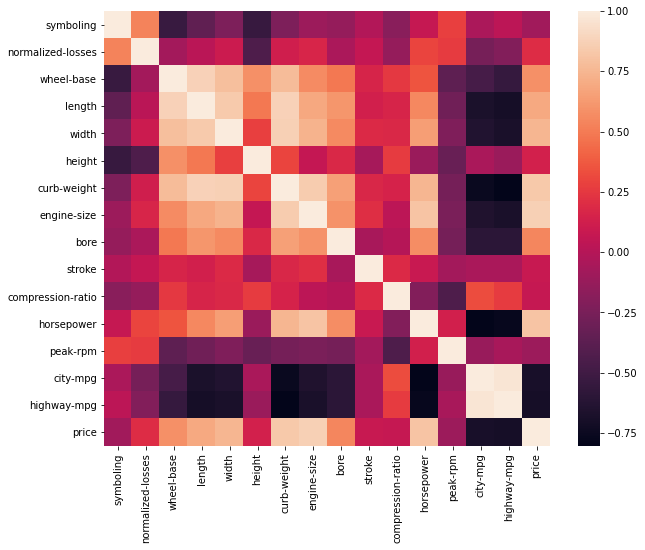

In [16]:
# на heatmap явно видно, что есть коррелирующие с таргетом параметры
plt.figure(figsize = (10, 8))
sns.heatmap(df.select_dtypes(exclude = 'object').corr())

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


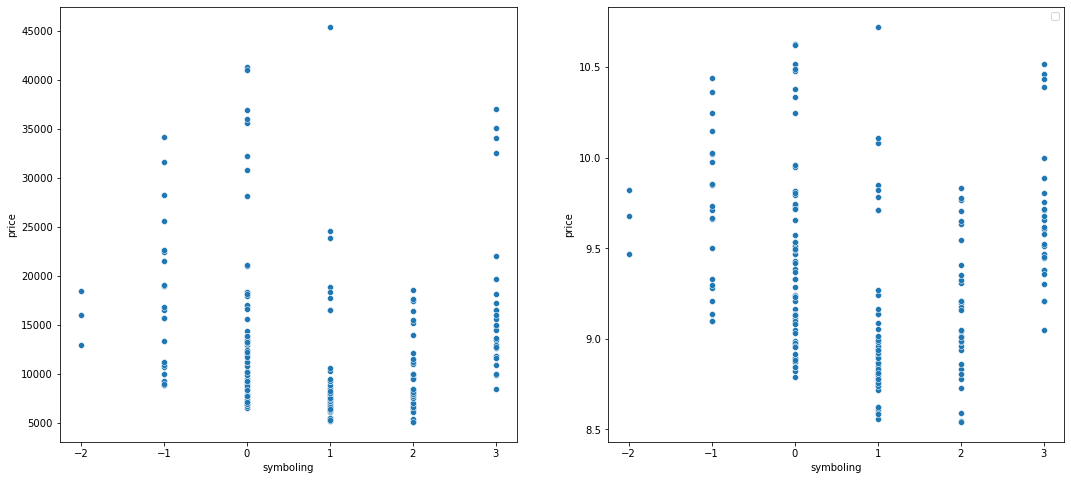

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


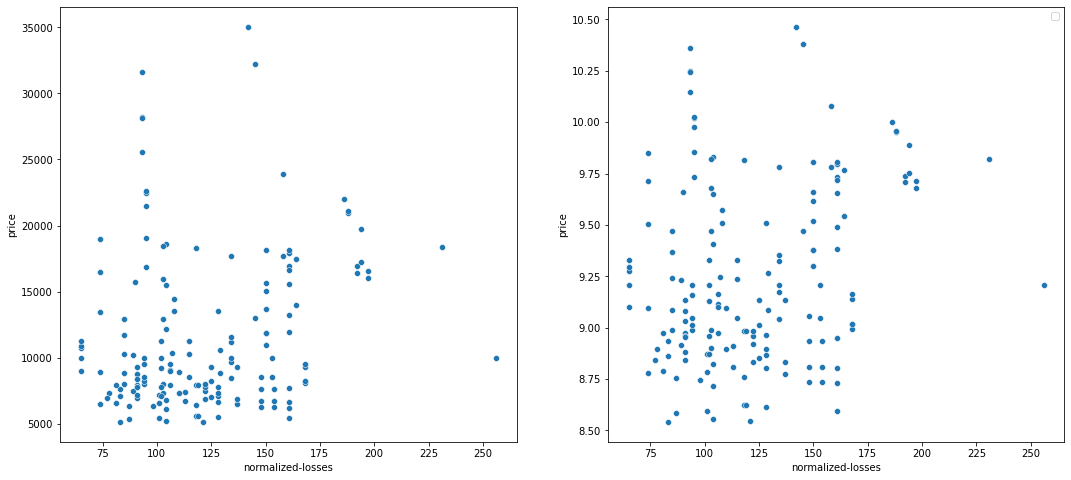

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


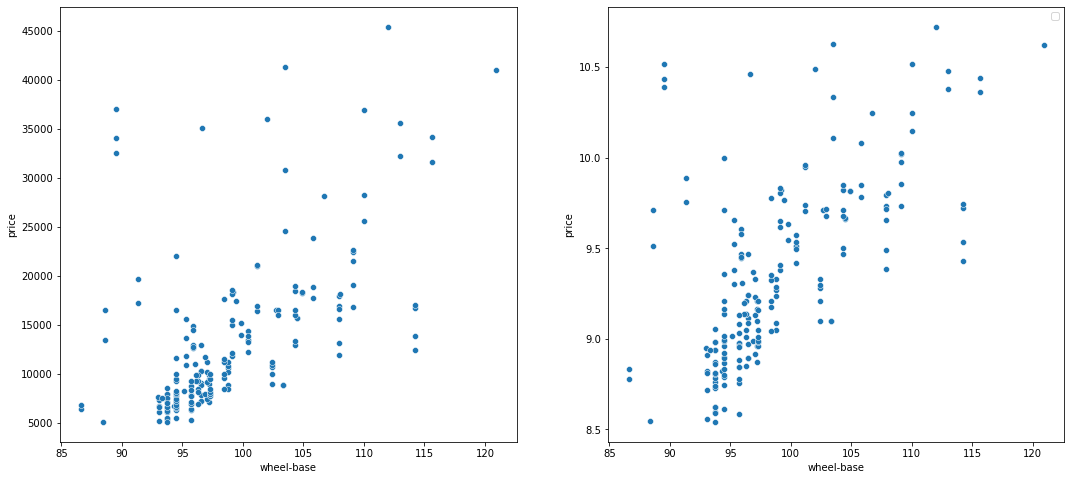

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


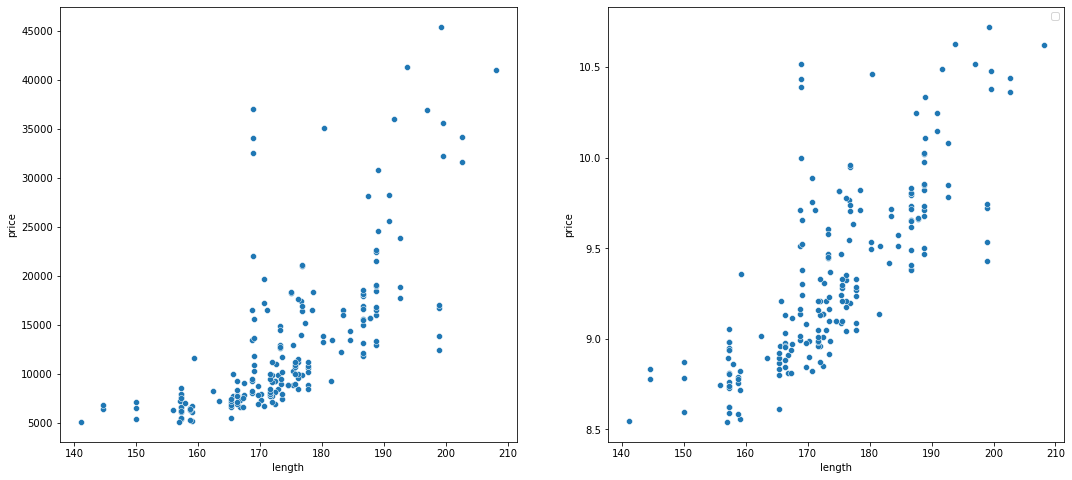

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


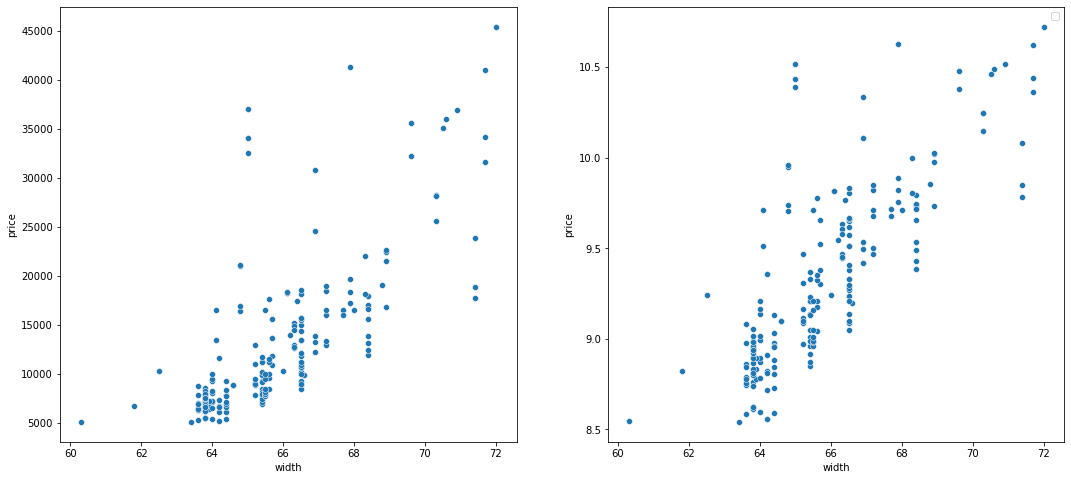

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


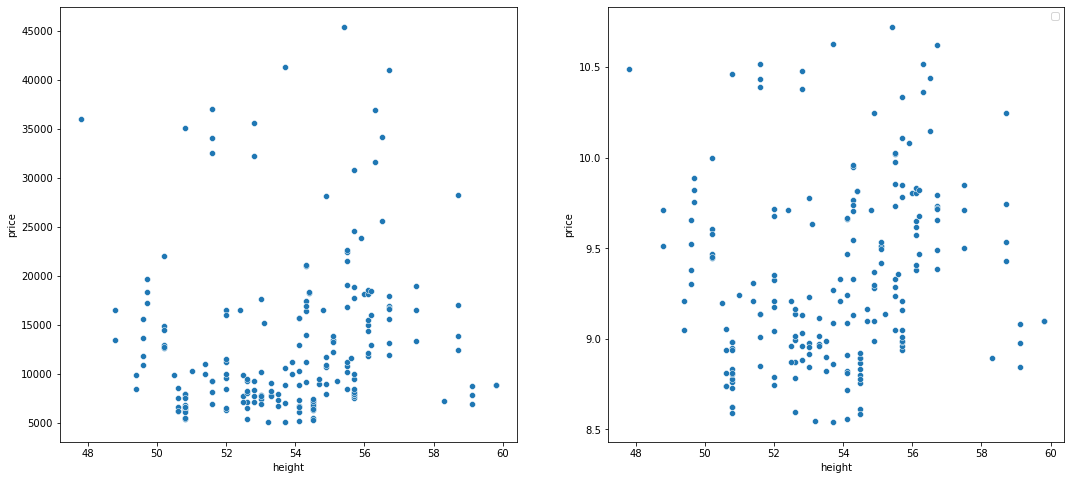

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


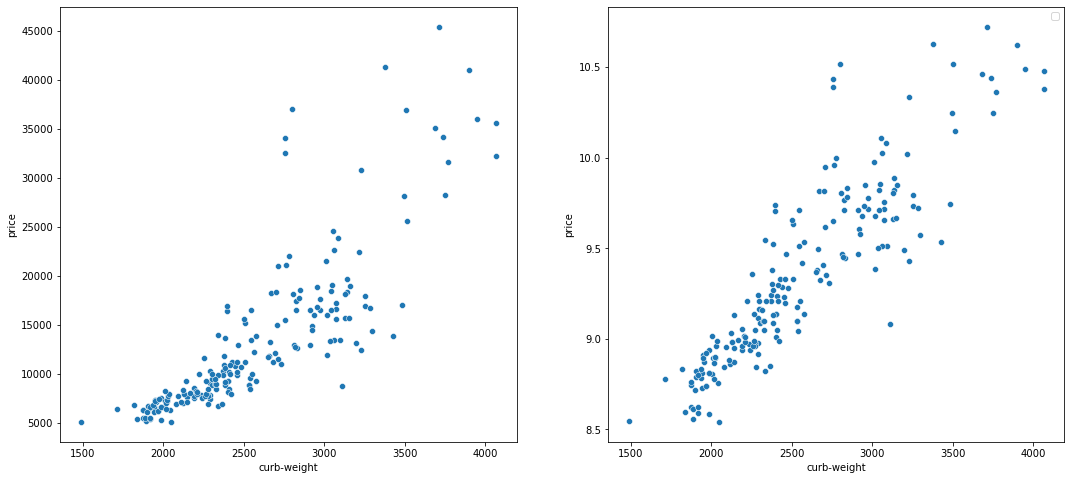

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


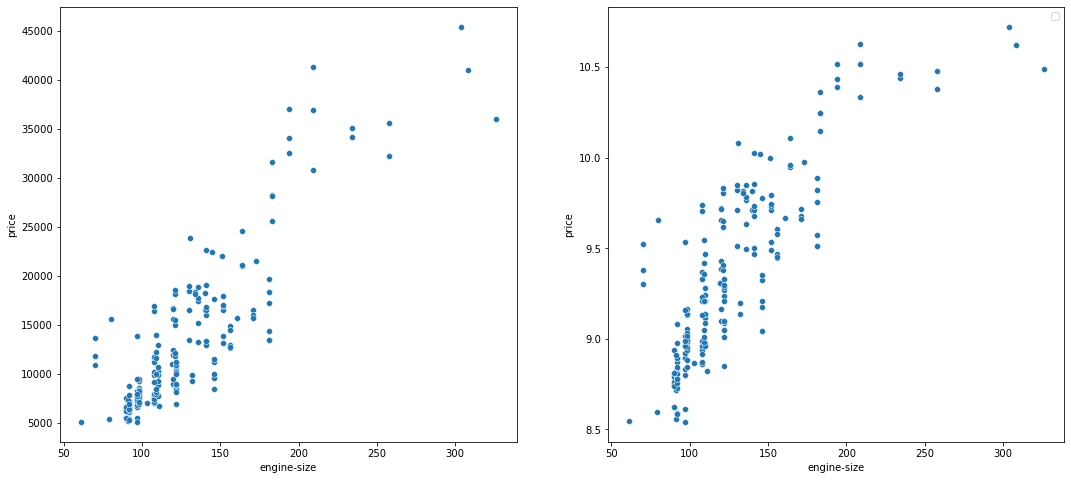

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


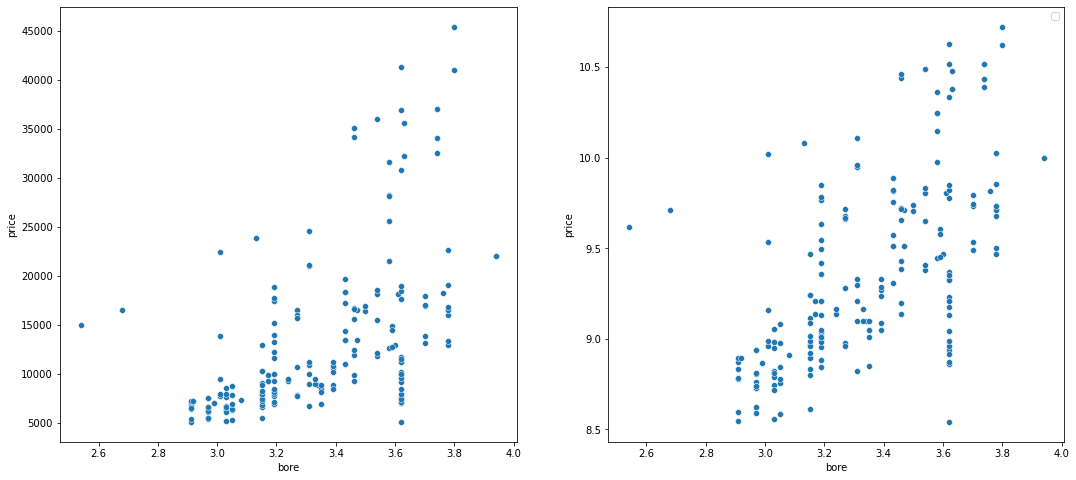

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


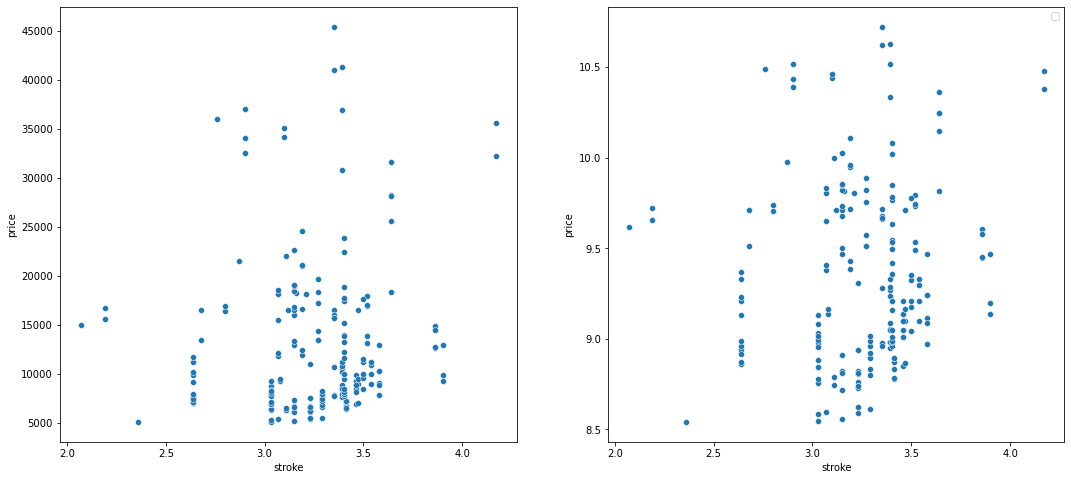

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


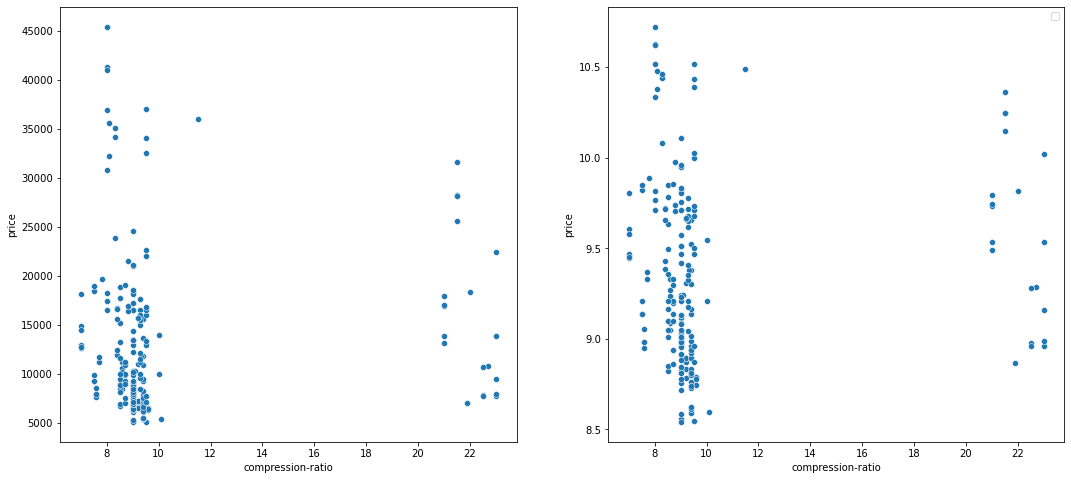

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


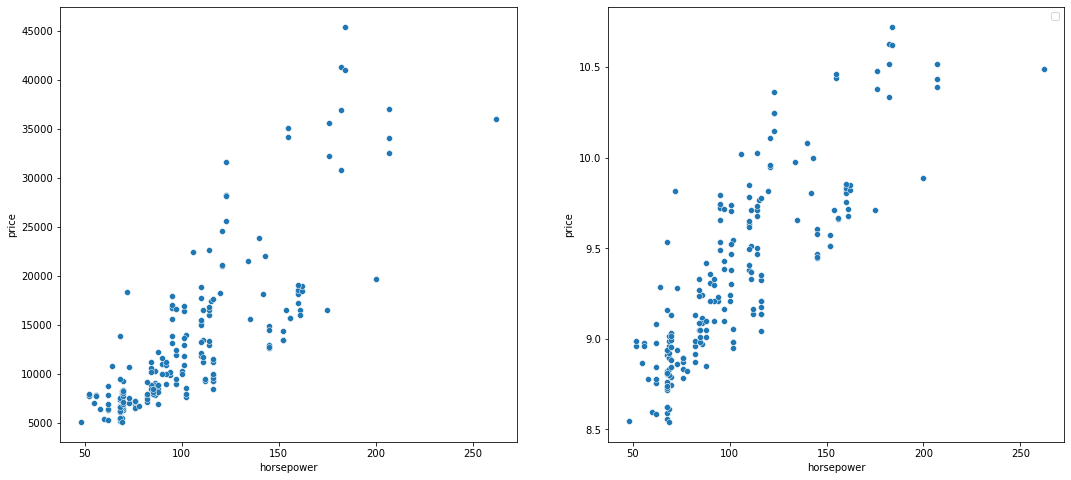

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


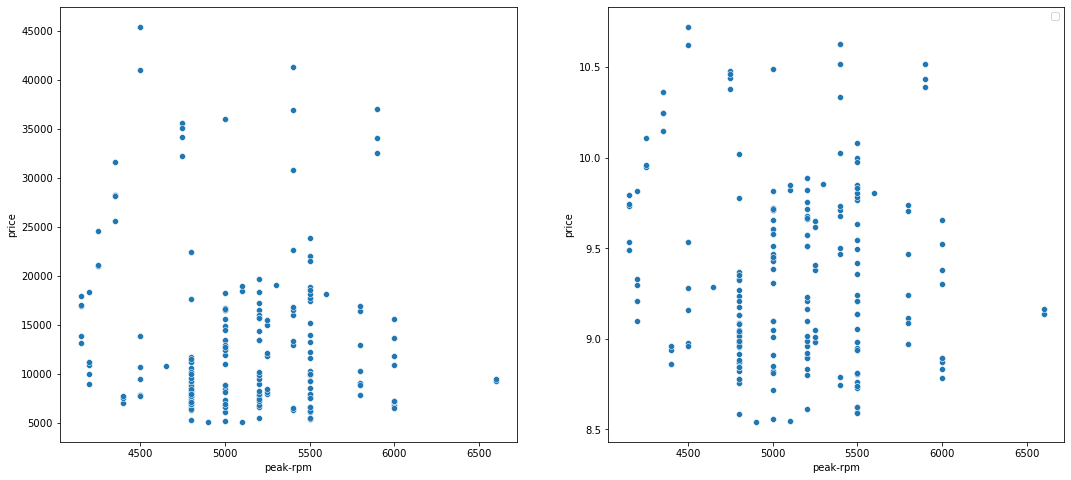

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


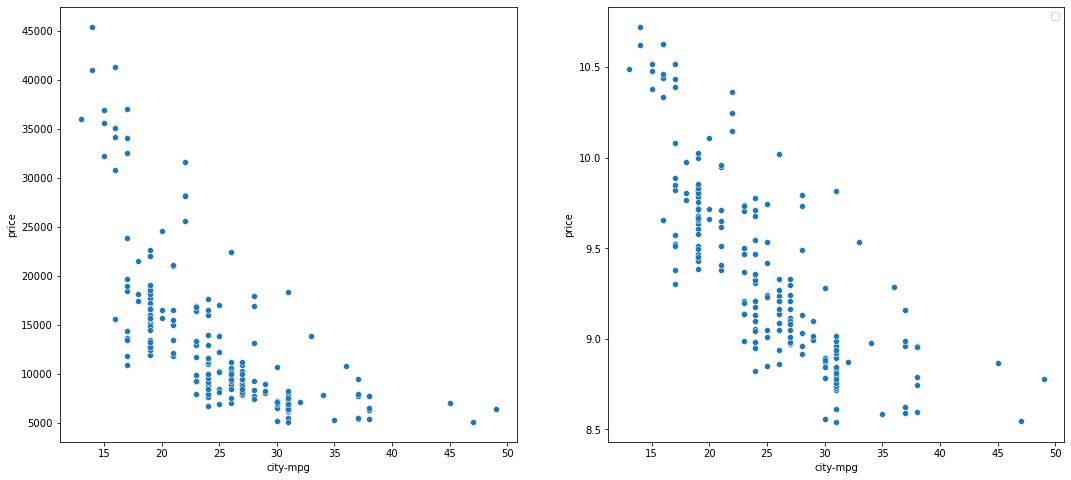

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


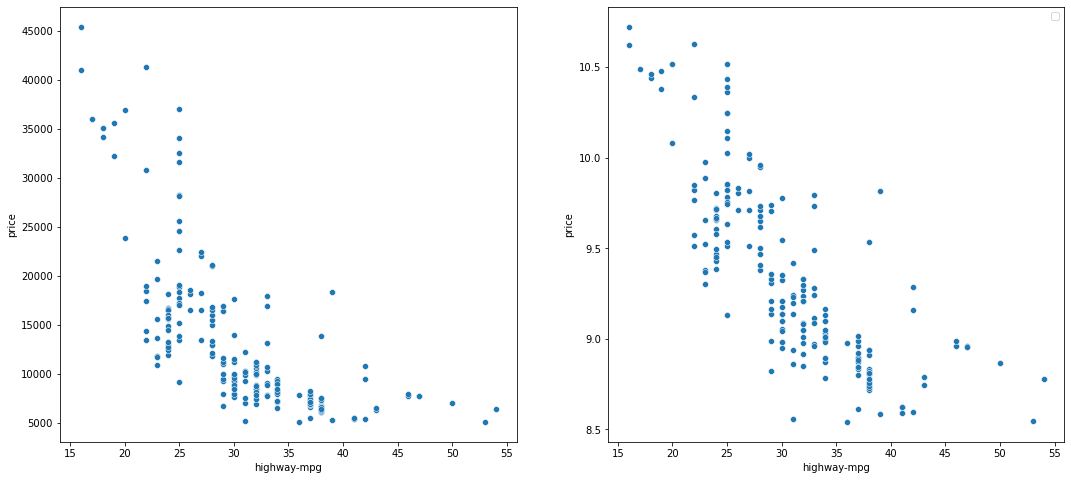

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gusen\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


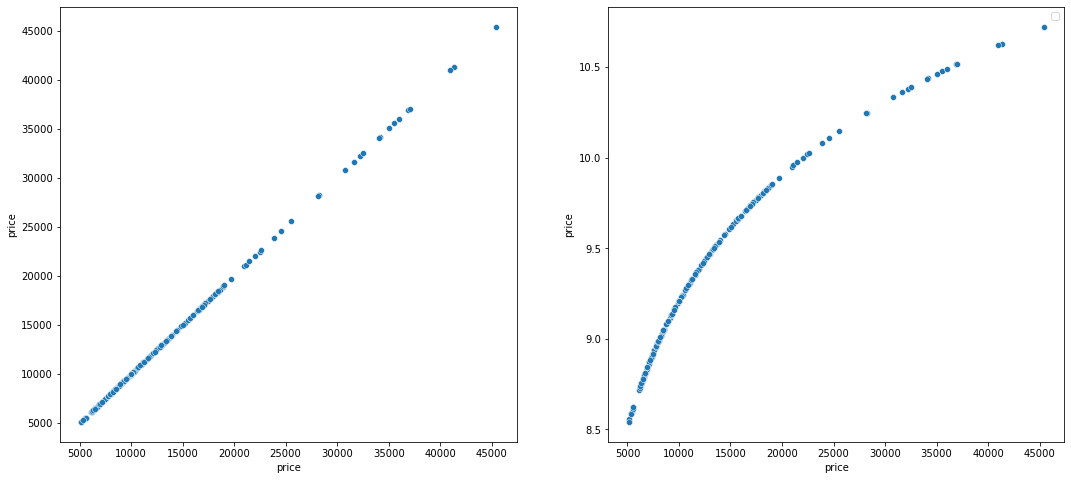

In [17]:
# Построим scatterplots для price и каждого остального численного параметра
# Будем строить для price и для log(price) одновременно 
# Графики могут подсказать, где есть явные зависимости с таргетом
for col in df.select_dtypes(exclude = 'object').columns:
    plt.figure(figsize = (18,8))
    plt.subplot(1, 2, 1) 
    sns.scatterplot(df[col],
                    df['price'])
    
    plt.subplot(1, 2, 2) 
    sns.scatterplot(df[col],
                    np.log(df['price']))
    plt.legend()
    plt.show()

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


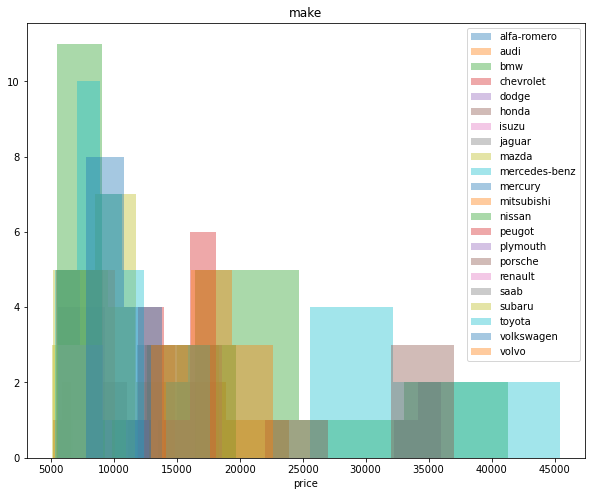

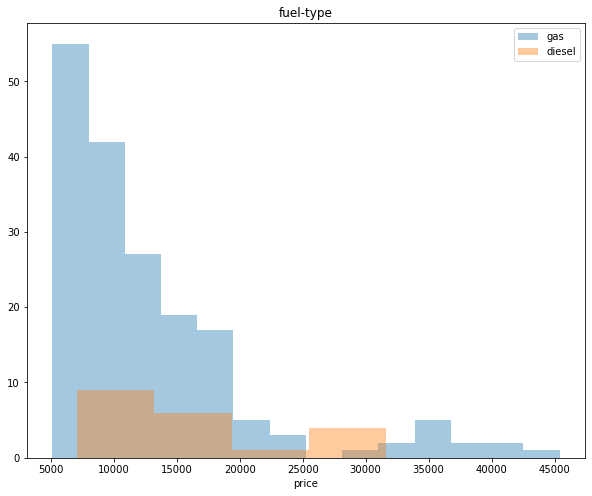

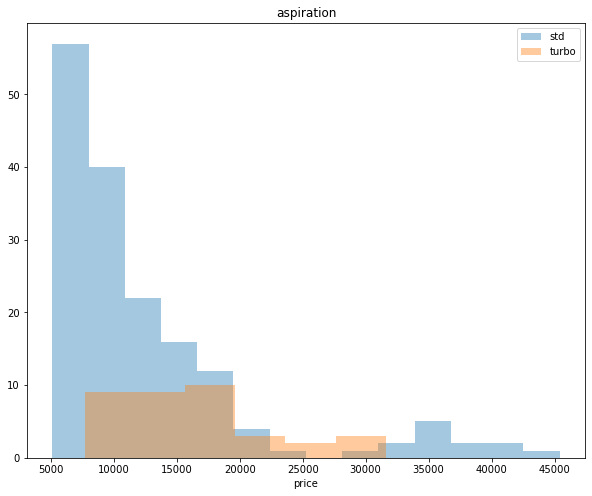

C:\Users\gusen\anaconda3\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\gusen\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


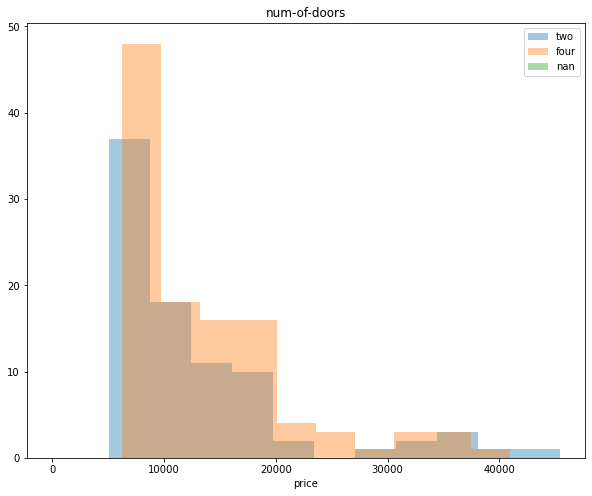

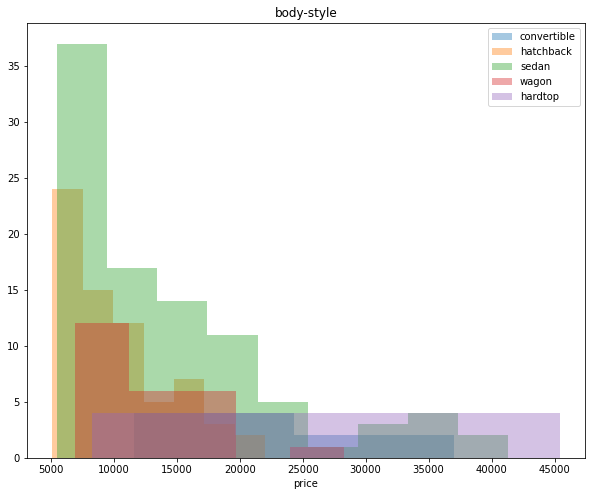

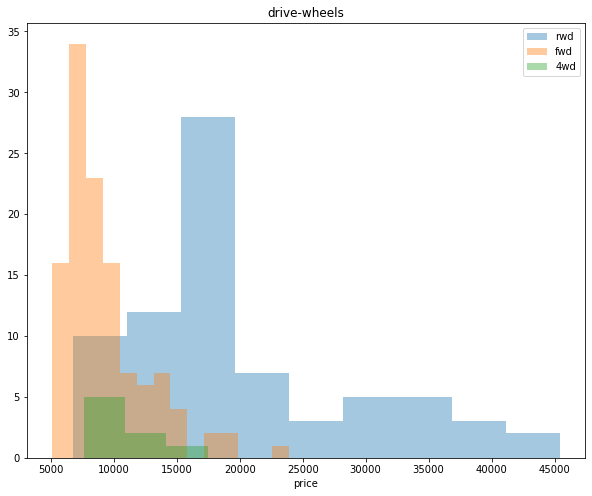

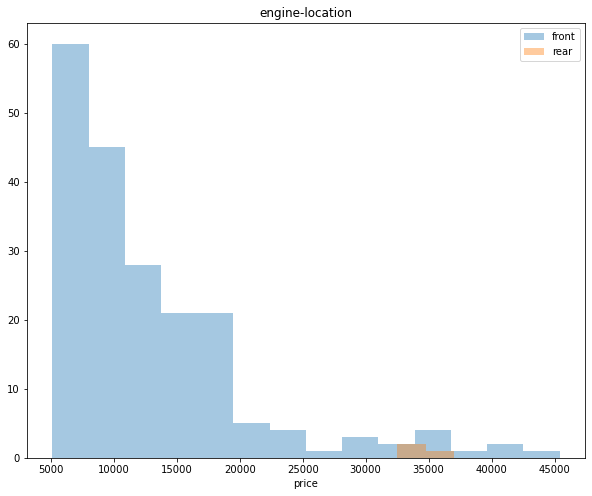

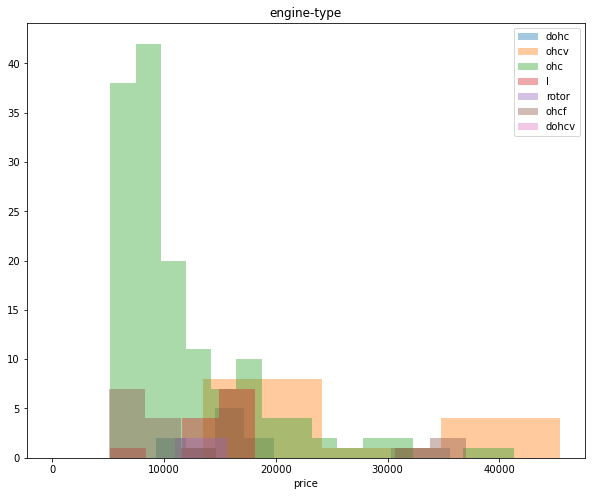

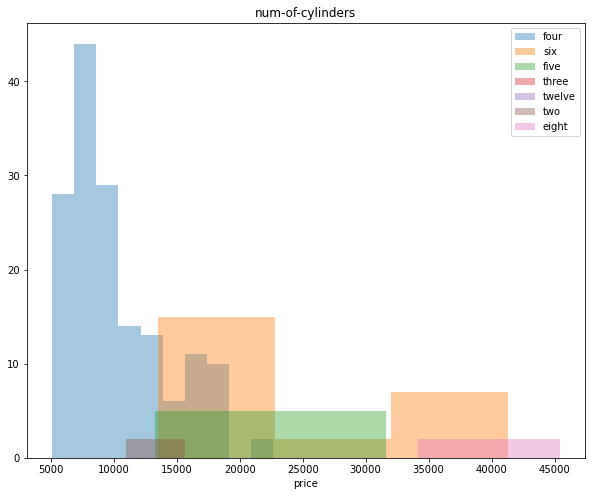

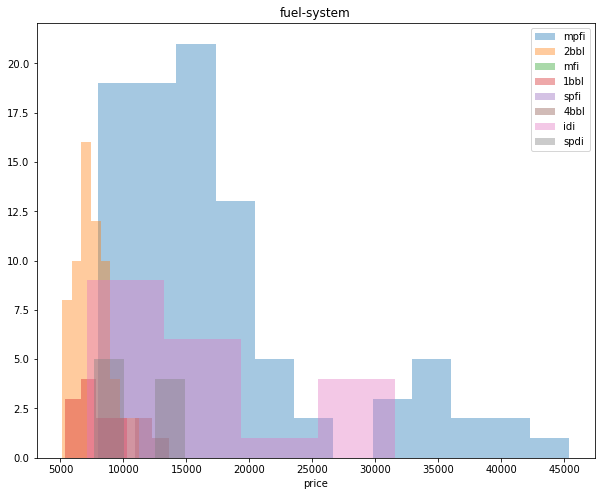

In [18]:
# Построим все распределения price по категориальным параметрам.
# Не на всех графика получится адекватно разглядеть распределения, т.к. категорий может быть много
# Но будет полезно увидеть, мб какие-то из категорий сразу покажутся значимыми
for col in str_columns:
    plt.figure(figsize = (10,8))
    for c in df[col].unique():
        sns.distplot(df[df[col] == c]['price'], 
                     kde = False,
                     label = c)
    plt.title(col)
    plt.legend()
    plt.show()

#### 3.3. Преобразование категориальных фичей

Применим *one-hot-encoding*
Возьмём достаточно просто подход: если категорий мало (допустим, не более 5), то применяем метод.<br>Если же категорий больше 5, то рассмотрим индивидуально, схлопнем несколько категорий в одну

In [19]:
# Оценим наполняемость и число уникальных значений в стринговых колонках
print('Unique values', end = '\n\n')
for c in str_columns:
    print(f'{c}: {df[c].nunique()}')

Unique values

make: 22
fuel-type: 2
aspiration: 2
num-of-doors: 2
body-style: 5
drive-wheels: 3
engine-location: 2
engine-type: 7
num-of-cylinders: 7
fuel-system: 8


In [20]:
# Подготовим два листа: готовый для энкодинга и требующий подготовки
to_encode_cols_prep = []
to_encode_cols_raw = []
for c in str_columns:
    if df[c].nunique() <= 5:
        to_encode_cols_prep.append(c)
    else:
        to_encode_cols_raw.append(c)

In [21]:
# Заэнкодим готовые атрибуты

for c in to_encode_cols_prep:
    df = pd.concat([df,pd.get_dummies(df[c],
                                      prefix = c)],
                   axis = 1)
df.drop(columns = to_encode_cols_prep,
        inplace = True)

In [22]:
# Атрибуты для подготовки
to_encode_cols_raw

['make', 'engine-type', 'num-of-cylinders', 'fuel-system']

In [23]:
# Можно оставить крупные категории,а все, у кого количество значений меньше 10 - схлопнуть в 'rest'
# Можно пойти логическим путём - схлопнуть по регионам производства (азия, европа, сша)
# Также можно в лоб применить one-hot-энкодинг, но количество фичей сильно размножится
# Особенно с учетом малого числа записей 

# Забегая вперед - из алгоритмов возьмём CatBoost, он умеет самостоятельно хитро преобразовывать категориальные фичи
# Ничего с этим атрибутом не делаем, бросим в таком виде в CatBoost

df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64

In [24]:
# Явная несбалансированность фичи. Сделаем 1 vs rest
df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [25]:
df['engine-type'] = df['engine-type'].apply(lambda x: 1 if x == 'ohc' else 0)

In [26]:
# Фича в принципе может быть переведена в числовой формат по своему смыслу
# Особенно с учетом того, что планируется к использованию tree-based модель

df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [27]:
mapping = {'four' : 4,
           'six' : 6,
           'five' : 5,
           'eight' : 8,
           'two' : 2,
           'three' : 3,
           'twelve' : 12} 

df['num-of-cylinders'] = df['num-of-cylinders'].map(mapping)

In [28]:
# Схлопнем до уровня 4-х энкодингов

df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64

In [29]:
mapping = {'mpfi' : 'mpfi',
           '2bbl' : '2bbl',
           'idi' : 'idi',
           '1bbl' : '1bbl',
           'spdi' : 'rest',
           '4bbl' : 'rest',
           'spfi' : 'rest',
           'mfi' : 'rest'} 

df['fuel-system'] = df['fuel-system'].map(mapping)

df = pd.concat([df, pd.get_dummies(df['fuel-system'],
                                   prefix = 'fuel-system')],
               axis = 1)

df.drop(columns = ['fuel-system'], inplace = True)

#### 3.4. Работа с пропущенными значениями

In [30]:
df.isna().sum().value_counts()

0     34
4      3
2      2
41     1
dtype: int64

In [31]:
df.isna().sum()[df.isna().sum() > 0]

normalized-losses    41
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [32]:
# Дропнем фичу со значительным количеством пропусков 
# дронем оставшиеся строчки с пропущенными значениями

df.drop(columns = ['normalized-losses'], inplace = True)

df.dropna(inplace = True)

## 4. Обучение модели

### 4.1 Baseline обучение, первичная оценка фичей
Был выбран градиентный бустинг на деревьях catboost. Градиентный бустинг подойдет для задачи хорошо потому, что присутствуют категориальные фичи с нелинейной зависимостью. Например, даже если бы мы проэнкодили фичу производителя автомобилей, то очень сомнительно, что линейные модели правильно интерпретировали бы этот показатель. Поэтому, вариант линейных моделей отпадает, алгоритмы же на решающих деревьях смотрятся в более подходящем ключе.

In [33]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

In [34]:
X, Y = df[[x for x in df.columns if x != 'price']], df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    random_state=1)

In [35]:
model = CatBoostRegressor(iterations = 150,
                          learning_rate = 0.05,
                          depth = 5,
                          od_type = "Iter",
                          od_wait = 15)

In [36]:
model.fit(X_train, Y_train,
          eval_set = Pool(data = X_test, 
                          label = Y_test,
                          cat_features = ['make']),
          cat_features = ['make'],
          plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 7374.7064437	test: 8932.4659643	best: 8932.4659643 (0)	total: 190ms	remaining: 28.3s
1:	learn: 7161.5815795	test: 8704.2353889	best: 8704.2353889 (1)	total: 201ms	remaining: 14.9s
2:	learn: 6939.8227320	test: 8476.0871618	best: 8476.0871618 (2)	total: 208ms	remaining: 10.2s
3:	learn: 6771.6420536	test: 8304.2460730	best: 8304.2460730 (3)	total: 216ms	remaining: 7.88s
4:	learn: 6586.3443307	test: 8128.9040490	best: 8128.9040490 (4)	total: 224ms	remaining: 6.48s
5:	learn: 6410.0559309	test: 7889.8672798	best: 7889.8672798 (5)	total: 232ms	remaining: 5.57s
6:	learn: 6226.4101788	test: 7690.6384342	best: 7690.6384342 (6)	total: 240ms	remaining: 4.9s
7:	learn: 6066.7035706	test: 7534.5185824	best: 7534.5185824 (7)	total: 248ms	remaining: 4.41s
8:	learn: 5928.4482872	test: 7402.3598276	best: 7402.3598276 (8)	total: 256ms	remaining: 4.02s
9:	learn: 5744.1968157	test: 7196.8149534	best: 7196.8149534 (9)	total: 264ms	remaining: 3.7s
10:	learn: 5585.0587043	test: 7029.7447565	best: 702

In [37]:
def plot_feature_importance(importance, names ,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(12, 20))
    sns.barplot(x=fi_df['feature_importance'].head(300), y=fi_df['feature_names'].head(300))
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

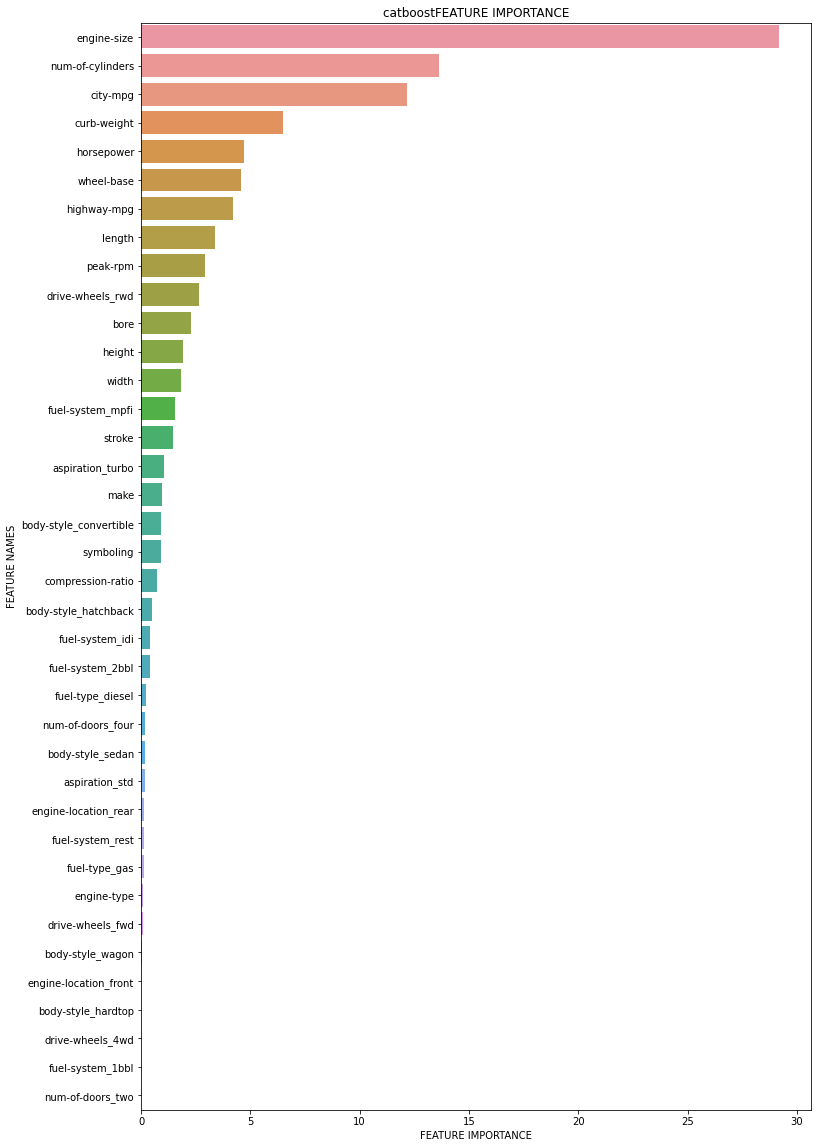

In [38]:
plot_feature_importance(model.get_feature_importance(), model.feature_names_, 'catboost')

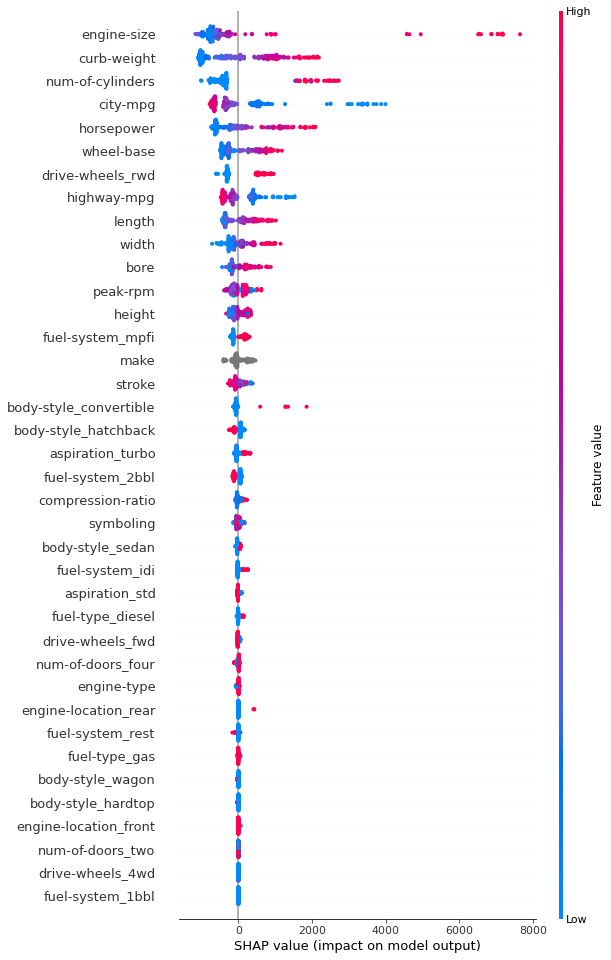

In [39]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, pd.DataFrame(X, columns = X.columns), max_display = 200)

### 4.2 Попробуем немного подбирать гиперпараметры с кросс-валидацией

In [40]:
# Зафиксируем два датасета - на одном подбираем гиперпараметры с использованием кросс-валидации
# Второй показывает финальную оценку

X, Y = df[[x for x in df.columns if x != 'price']], df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    random_state = 7)

In [41]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [42]:
def cv_pipeline(reg_model, 
                X_train, Y_train, 
                X_test, Y_test,
                cv_num = 5):
    
    cv_res = cross_validate(reg_model, X_train, Y_train, cv=5,
                            scoring = 'neg_root_mean_squared_error')
    print(f'Scores: {np.abs(cv_res["test_score"])}')
    print(f'Scores STD: {np.std(np.abs(cv_res["test_score"]))}')
    print(f'Mean CV score {np.mean(np.abs(cv_res["test_score"]))}')
    reg_model.fit(X_train, Y_train)
    print(f'Holdout set error: {np.sqrt(mean_squared_error(Y_test, reg_model.predict(X_test)))}')

In [43]:
model1 = CatBoostRegressor(iterations = 150,
                          learning_rate = 0.05,
                          depth = 5,
                          od_type = "Iter",
                          od_wait = 15,
                          cat_features = ['make'],
                          verbose = False)

cv_pipeline(model1, 
            X_train, Y_train, 
            X_test, Y_test)

Scores: [3306.55191512 2364.31924239 3422.51619808 2115.798919   3084.0074083 ]
Scores STD: 522.5969387982907
Mean CV score 2858.638736578604
Holdout set error: 2074.134364676759


In [44]:
model2 = CatBoostRegressor(iterations = 500,
                          learning_rate = 0.05,
                          depth = 4,
                          od_type = "Iter",
                          od_wait = 15,
                          cat_features = ['make'],
                          verbose = False)

cv_pipeline(model2, 
            X_train, Y_train, 
            X_test, Y_test)

Scores: [3286.41875969 1961.78105879 2961.87388432 1974.0038819  2923.40795091]
Scores STD: 548.3794403970053
Mean CV score 2621.497107121671
Holdout set error: 1722.9457647738607


In [45]:
model3 = CatBoostRegressor(iterations = 1000,
                          learning_rate = 0.05,
                          depth = 3,
                          od_type = "Iter",
                          od_wait = 15,
                          cat_features = ['make'],
                          verbose = False)

cv_pipeline(model3, 
            X_train, Y_train, 
            X_test, Y_test)

Scores: [3380.42672193 1913.65398997 2725.47629636 1761.7333562  2780.3252848 ]
Scores STD: 598.7742515120586
Mean CV score 2512.3231298517703
Holdout set error: 1682.7008110491677


При текущем раскладе из трех наборов гиперпараметров остановимся на последнем, как показавшем наименьшие ошибки как на кросс-валидационном подборе, так и на финальной оценке. Кроме того, довольно мало обучающих примеров, поэтому явно модели с большей глубиной переобучаются в сравнении с теми, у которых глубина меньше

In [46]:
model3.fit(X, Y)

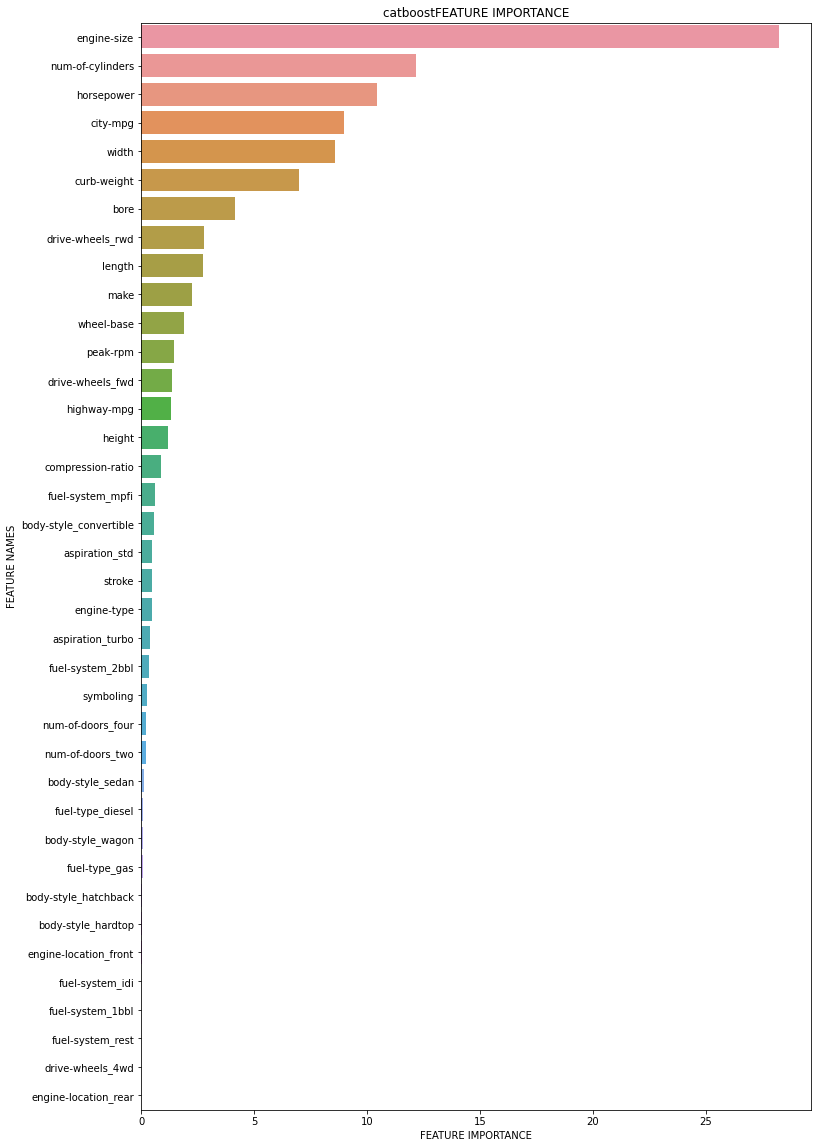

In [47]:
plot_feature_importance(model3.get_feature_importance(), model.feature_names_, 'catboost')

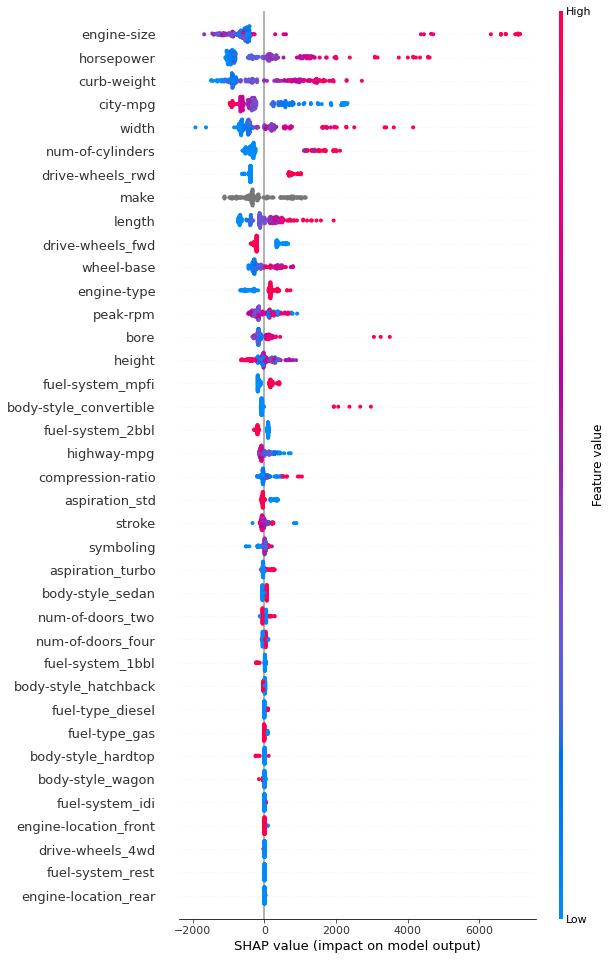

In [48]:
explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, pd.DataFrame(X, columns = X.columns), max_display = 200)

## 5. Комментарии по улучшению модели

Модели, которые были обучены выше, собраны почти на коленке. Если бы имелся значительно б*о*льший датасет, то можно было бы улучшить модели следующим образом: 
1. Серьезнее поработать с категориальными фичами. Подумать, подходит ли текущий подход с энкодингом категориальных фичей, быть может, пересмотреть его индивидуально для каждой фичи. 
2. Построить новые фичи - например, произведение длины на ширину на высоту, отношение лошадиных сил к предыдущей фиче и т.д. Возможно, на большой статистике нашлись бы интересные закономерности.
3. Убрать лишние фичи. Поискать взаимно коррелирующие, обучить модель на всём датасете и выкинуть те, которые имеют низкий feature importance
4. Аккуратнее поработать с заполнением пропусков в данных. Обучить imputer-модель и заполнить пропуски.
5. Поработать над очисткой от аутлаеров.
6. Автоматизировать поиск гиперпараметров - бросить сетку из набора гиперпараметров для grid search cv
7. Построить набор различных по природе моделей - линейные, различные деревянные. Попробовать обучать их не на всём датасете, а каждой моделе - выборочный кусок (например, рандомные 0.7 датасета)
8. Построить ансамбль разных моделей и обернуть в генеральную модель над ними.